## Telecom Churning


#### Business Objective

To predict the users churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

Three phases of the customer lifecycle,

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned.


## Import the Libraries

In [1]:
#import the Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the Libraries
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
import numpy as np
import math
from IPython.display import Markdown, display ,HTML
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

warnings.filterwarnings('ignore')

In [4]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, recall_score

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# Importing required packages for visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydot, graphviz

# Other sklearn packages
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

## Reading the dataset

In [5]:
inp0 = pd.read_csv("telecom_churn_data.csv")

In [6]:
inp0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [7]:
inp0.shape

(99999, 226)

In [8]:
inp0.info(verbose=1)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [9]:
inp0.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [11]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in inp0.columns if column not in id_cols + date_cols + cat_cols]

In [17]:
print(" ID cols: %d\n Date cols:%d\n Numeric cols:%d\n Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

 ID cols: 2
 Date cols:12
 Numeric cols:204
 Category cols:8


## Data Cleaning

Data must be cleaned before analysing the relevant dataset. 

### 1. Remove missing Values 
Dropping the columns which are having missing values

In [18]:
# Checking missing values percentages
pd.set_option('display.max_rows', None)
telecom_null_check = 100*inp0.isnull().sum()/len(inp0)
df = pd.DataFrame(telecom_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


 Removing the columns having missing values more than 70%.
 
 #### Null columns list 


In [20]:
Missing_Vals_Column_70=list(df.index[df['Null_Percentage'] > 70])
(Missing_Vals_Column_70)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

### Excluding the columns related to 

Max_recharge, 
total_recharge data and 
avg recharge amount data, as these columns might provide us with some insight.


In [21]:
Missing_Vals_Column_70=inp0.columns[round(100*inp0.isnull().sum()/len(inp0),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
inp0=inp0.drop(Missing_Vals_Column_70,axis=1)
inp0.shape

(99999, 198)

In [23]:
# Checking missing values percentages again
def NULL_CHECK(X):
    pd.set_option('display.max_rows', None)
    telecom_null_check_2 = 100*X.isnull().sum()/len(X)
    df = pd.DataFrame(telecom_null_check_2)
    df.rename(columns={0:'Null_Percentage'}, inplace=True)
    return df.sort_values('Null_Percentage', ascending=False)

NULL_CHECK(inp0)

,Null_Percentage
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
max_rech_data_9,74.08
total_rech_data_9,74.08
av_rech_amt_data_9,74.08
max_rech_data_8,73.66


### Impute Values for NA

Impute the NA values by 0, meaning that there was no recharge done by the customer

In [25]:
# Impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [26]:
# Impute missing values with 0
inp0[zero_impute_rch] = inp0[zero_impute_rch].apply(lambda x: x.fillna(0))

In [27]:
print(inp0[zero_impute_rch].isnull().sum()*100/inp0.shape[1])

total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
total_rech_data_9                    0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
av_rech_amt_data_8                   0.00
av_rech_amt_data_9                   0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
max_rech_data_8                      0.00
max_rech_data_9                      0.00
dtype: float64


### Remove columns not required

In [29]:
# Dropping the ID and Date columns as it is not required. 
Dropping=id_cols + date_cols
initial_cols = inp0.shape[1]
Cols_to_drop=[col for col in Dropping if col in inp0.columns]
inp0=inp0.drop(Cols_to_drop,axis=1)
inp0.shape

(99999, 188)

### Imputing null Columns as 0

In [30]:
inp0[inp0.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = inp0[inp0.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)


In [31]:
NULL_CHECK(inp0)

,Null_Percentage
loc_og_t2o_mou,0.00
ic_others_8,0.00
spl_ic_mou_7,0.00
spl_ic_mou_8,0.00
spl_ic_mou_9,0.00
isd_ic_mou_6,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00


In [32]:
# Dropping the below columns as it has 0 value only and not required for the analysis

inp0.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [33]:
inp0.shape

(99999, 185)

### Find Unique values

In [35]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)
 

In [36]:
unique_nan(inp0)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

### Drop the columns with one unique value 

In [38]:
cols = []
for i in inp0.columns:
    if inp0[i].nunique() ==1:
        cols.append(i)
        
cols

inp0 = inp0.drop(cols,1)
inp0.shape

(99999, 177)

In [39]:
NULL_CHECK(inp0)

,Null_Percentage
arpu_6,0.00
std_ic_t2t_mou_7,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00
ic_others_7,0.00
ic_others_8,0.00
ic_others_9,0.00
total_rech_num_6,0.00


### Data Preparation

Creating new column avg_recharge_6_7 by adding total recharge amount of 6 month and 7 month, then calculate average of sum.

In [40]:
res = inp0.total_rech_data_6[inp0.total_rech_data_6.isna()].index != inp0.av_rech_amt_data_6[inp0.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = inp0.total_rech_data_7[inp0.total_rech_data_7.isna()].index != inp0.av_rech_amt_data_7[inp0.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =inp0.total_rech_data_8[inp0.total_rech_data_8.isna()].index != inp0.av_rech_amt_data_8[inp0.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


Conclusion : 
    If total_rech_data is null then av_rech_amt_data is also null

In [42]:
inp0['avg_rech_6_7']=(inp0['total_rech_amt_6']+inp0['total_rech_amt_7'])/2

### High-value customers

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)


In [43]:
#Calculate 70th percentile for the new column
X=inp0['avg_rech_6_7'].quantile(0.7)
X

368.5

In [44]:
# filtering only the customers who have recharger more than X i.e are HIGH-VALUE Customers.
inp0=inp0[inp0['avg_rech_6_7'] >= X]
inp0.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00"
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.0

Checking rows with missing values

In [45]:
# counting the rows having more than 50% missing values.
Missing_rows=inp0[(inp0.isnull().sum(axis=1)) > (len(inp0.columns)//2)]
Missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [46]:
inp0.shape

(30011, 178)

### Churners Tagging 

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

We'll use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag the curners. For churners there will not be any voice and data usage.

In [47]:
inp0['Churn']= np.where((inp0['total_ic_mou_9']==0) & (inp0['total_og_mou_9']==0) & (inp0['vol_2g_mb_9']==0) & (inp0['vol_3g_mb_9']==0), 1, 0)
inp0.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,

In [48]:
inp0['Churn'].value_counts()

0    27418
1    2593 
Name: Churn, dtype: int64

### Remove attributes used for Churn Phase

After tagging churners, let us remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)


In [50]:
col_9 = [col for col in inp0.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [51]:
# Deleting the churn month columns
inp0 = inp0.drop(columns_9, axis=1)

In [52]:
# Dropping sep_vbc_3g column not required
inp0 = inp0.drop('sep_vbc_3g', axis=1)

### Outlier Treatment

In [60]:
# Converting the Churn column to Object data type in order to proceed with Outlier Treatment.

inp0['Churn'] = inp0['Churn'].astype(object)

In [61]:
# Listing numeric columns only
num_cols = inp0.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [62]:
inp0.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.03,304.34,267.60,417.93,423.92,375.02,17.41,13.52,13.26,29.32,22.04,21.47,94.68,95.73,87.14,181.28,181.27,167.59,6.98,7.10,6.49,1.57,1.86,1.71,282.95,284.11,261.23,189.75,199.88,172.20,203.10,213.41,179.57,2.01,2.03,1.79,394.87,415.33,353.56,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.75,70.31,65.94,159.61,160.81,153.63,15.60,16.51,14.71,243.97,247.64,234.28,16.23,16.89,15.05

In [64]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = inp0[col].quantile(0.10)
    q3 = inp0[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    new_DF = inp0.loc[(inp0[col] > range_low) & (inp0[col] < range_high)]

new_DF.shape

(29700, 135)

### Adding new columns with some insights

Adding dec_rech_action

Indicating if the number of recharge for a customer when compared to good phase is decreased in action phase or not

In [65]:
# Avg recharge number of two months(7 and 8) in action phase
new_DF['avg_rech_num_action'] = (new_DF['total_rech_num_7'] + new_DF['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
new_DF['diff_rech_num'] = new_DF['avg_rech_num_action'] - new_DF['total_rech_num_6']

In [66]:
# Checking if recharge number has decreasing in action phase, 1=Yes, 0=No
new_DF['dec_rech_action'] = np.where((new_DF['diff_rech_num'] < 0), 1, 0)

In [67]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53

Adding dec_avg_revenuePC_action

Indicating if average revenue per customer when compared to good phase is decreased in action phase or not

In [68]:
# average ARUP for two months(7 and 8) in action phase
new_DF['avg_arpu_action'] = (new_DF['arpu_7'] + new_DF['arpu_8'])/2
# Difference of good and action phase ARPU
new_DF['diff_arpu'] = new_DF['avg_arpu_action'] - new_DF['arpu_6']

In [69]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
new_DF['dec_avg_revenuePC_action'] = np.where((new_DF['diff_arpu'] < 0), 1, 0)

In [70]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.0

Adding dec_rech_amt_action

Indicating if recharge amt of customers when compared to good phase is decreased in action phase or not

In [72]:
# Avg recharge amount for two months(7 and 8) in action phase
new_DF['avg_rech_amt_action'] = (new_DF['total_rech_amt_7'] + new_DF['total_rech_amt_8'])/2
# Difference of action phase recharge amount and good phase recharge amount
new_DF['diff_rech_amt'] = new_DF['avg_rech_amt_action'] - new_DF['total_rech_amt_6']

In [73]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No
new_DF['dec_rech_amt_action'] = np.where((new_DF['diff_rech_amt'] < 0), 1, 0) 

In [74]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,3

Adding dec_MOU_action

Indicating if Minutes of Usages for the customers when compared to good phase is decreased in action phase or not

In [75]:
# Total mou at good phase incoming and outgoing
new_DF['total_mou_good'] = (new_DF['total_og_mou_6'] + new_DF['total_ic_mou_6'])
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_mou_action'] = (new_DF['total_og_mou_7'] + new_DF['total_og_mou_8'] + new_DF['total_ic_mou_7'] + new_DF['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_DF['diff_mou'] = new_DF['avg_mou_action'] - new_DF['total_mou_good']

In [76]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_DF['dec_MOU_action'] = np.where((new_DF['diff_mou'] < 0), 1, 0)

In [77]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.2

### EDA

Univariate Analysis

Churn rate based on whether the customer decreased the MOU in action month

In [78]:
# Converting churn column to integer, to do aggfunc in the pivot table
new_DF['Churn'] = new_DF['Churn'].astype('int64')

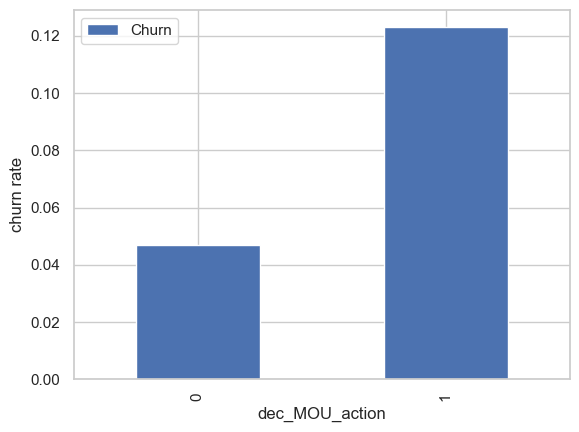

In [79]:
new_DF.pivot_table(values='Churn', index='dec_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Conclusion :
Churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.


#### Churn rate 
on the basis whether the customer decreased thef amount of recharge in action month

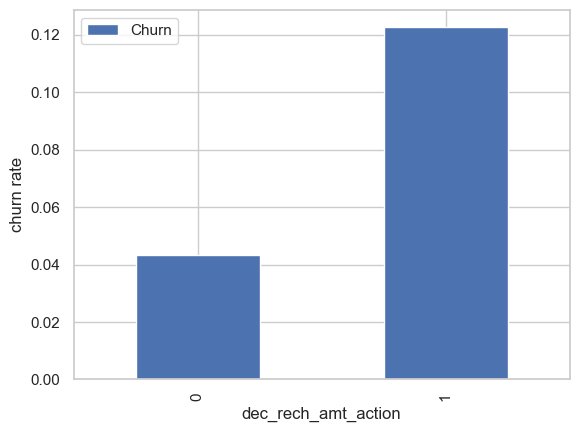

In [80]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Conclusion

Similar behavior the churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

#### Churn rate 
on the basis whether the customer decreased the number of recharge in action month

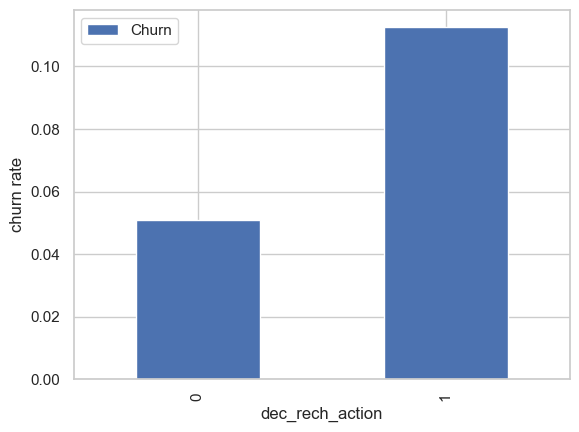

In [81]:
new_DF.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Conclusion

Result is as expected. 

The churn rate is more for the customers, number of recharge in the action phase is lesser than the number in good phase. 


#### Overall Conclusion

From the above 3 plots it shows that the customers do not do the monthly recharge more when they are in the action phase.


#### Analysis of MOU

Analysis of the minutes of usage MOU (churn and not churn) in the action phase


In [82]:
# Creating churn dataframe
Data_churn = new_DF[new_DF['Churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = new_DF[new_DF['Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

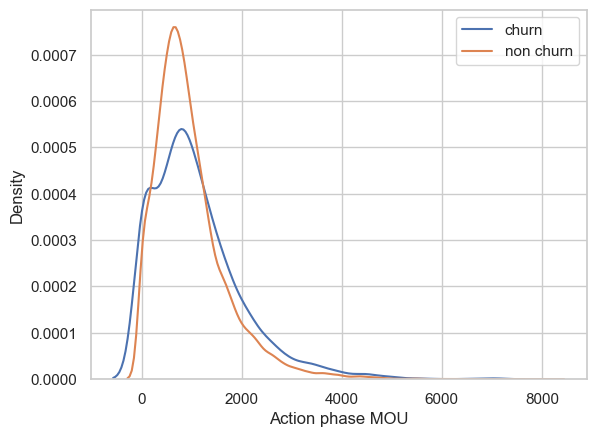

In [83]:
# Distribution plot
ax = sns.distplot(Data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

#### Conclusion

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.
    

### Bivariate Analysis


Churn rate and the decreasing recharge amount and number of recharge during the action phas

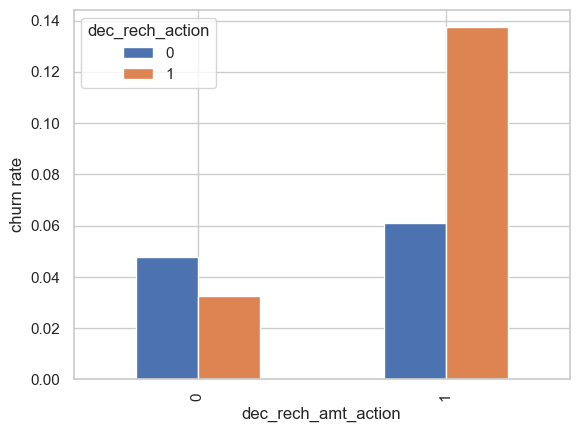

In [86]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Conclusion

The churn rate is higher for the customers, whose recharge amount as well as number of recharge have decreased in the action phase when compared to the good phase.


In [94]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_DF
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("deep"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("deep"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("deep"))
    plt.show()

In [95]:
recharge_amnt_columns =  inp0.columns[inp0.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

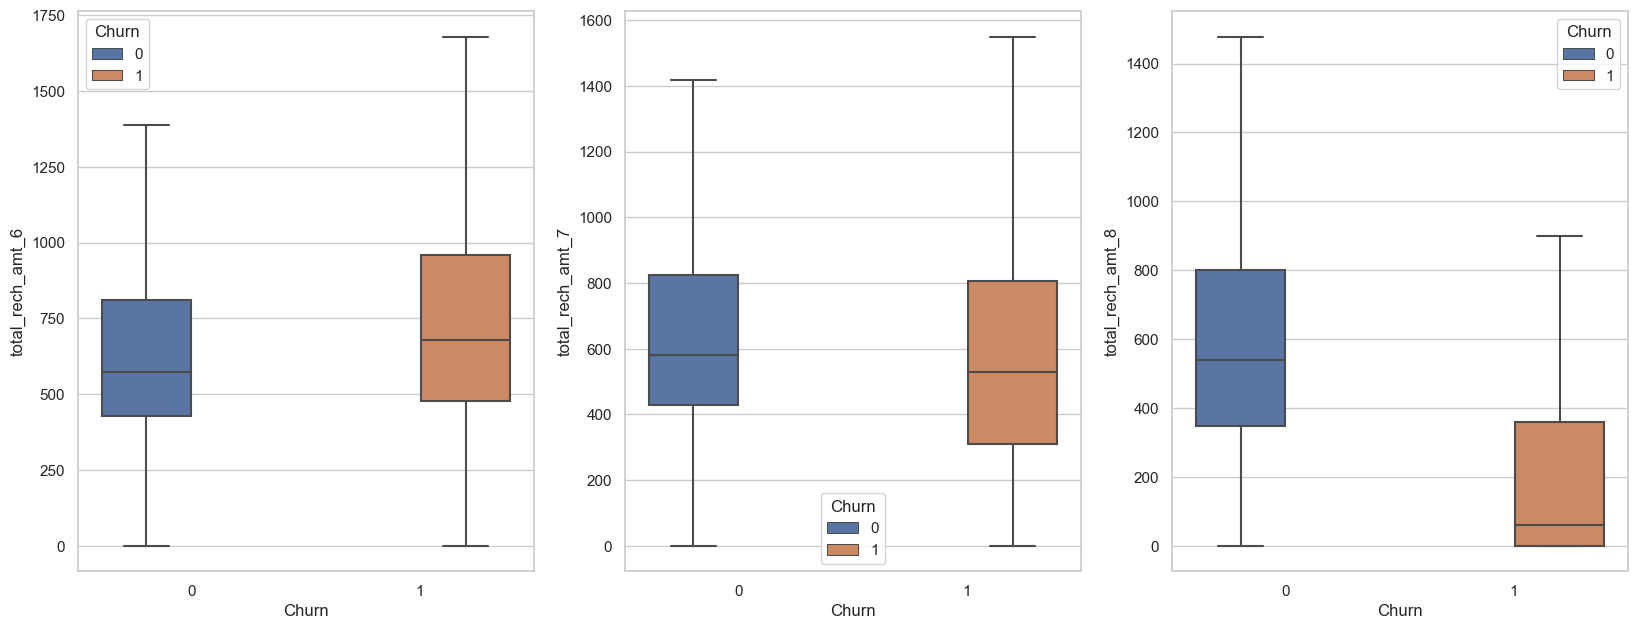

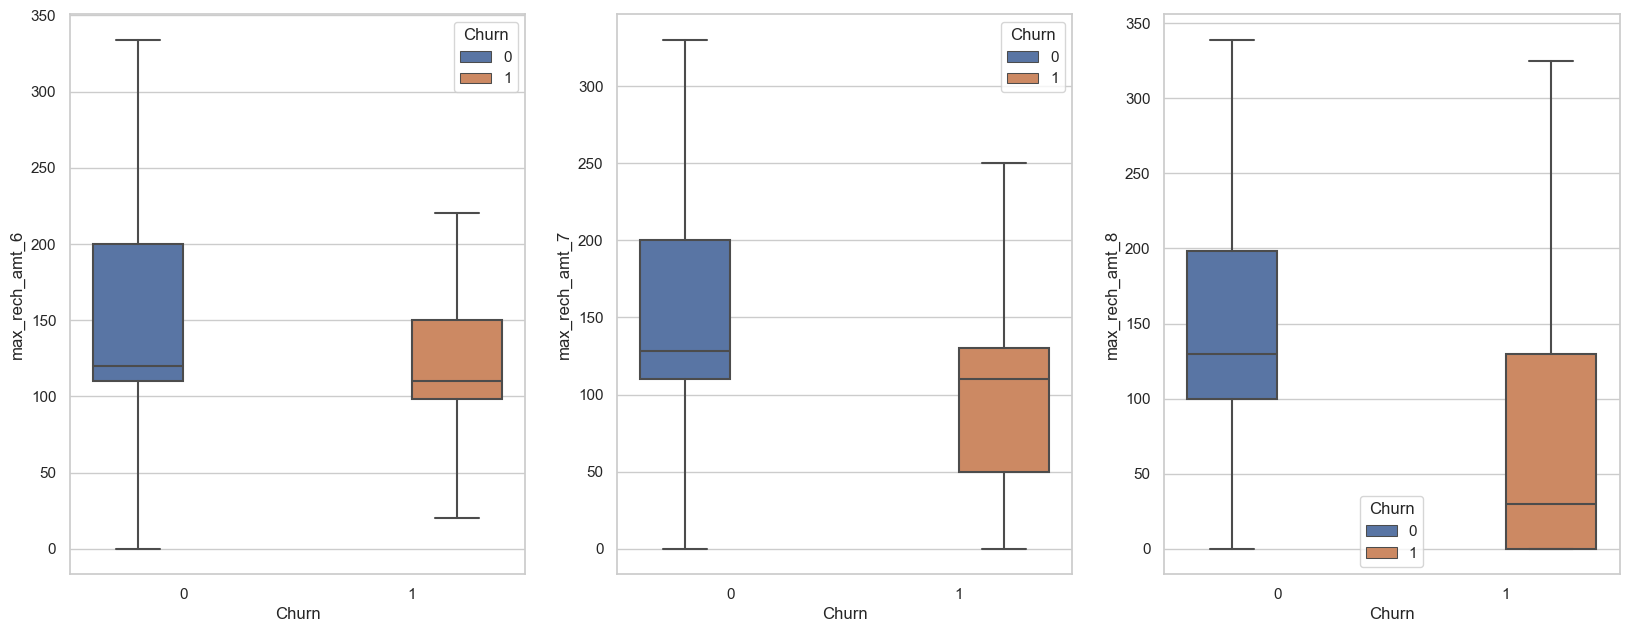

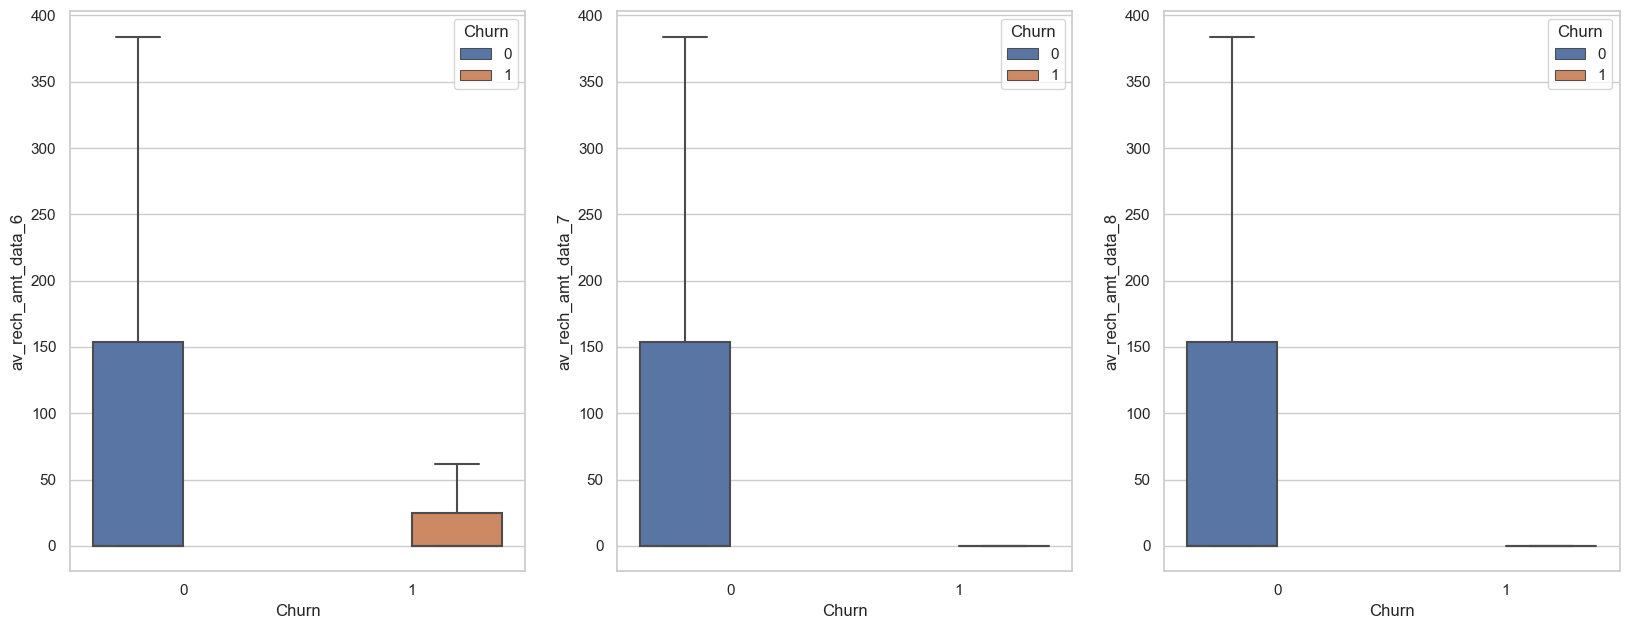

In [96]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

#### Conclusion

From the above plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.


In [97]:
# Dropping the Some of the Derived columns that are not needed furthur.

new_DF = new_DF.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [98]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [99]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in new_DF.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

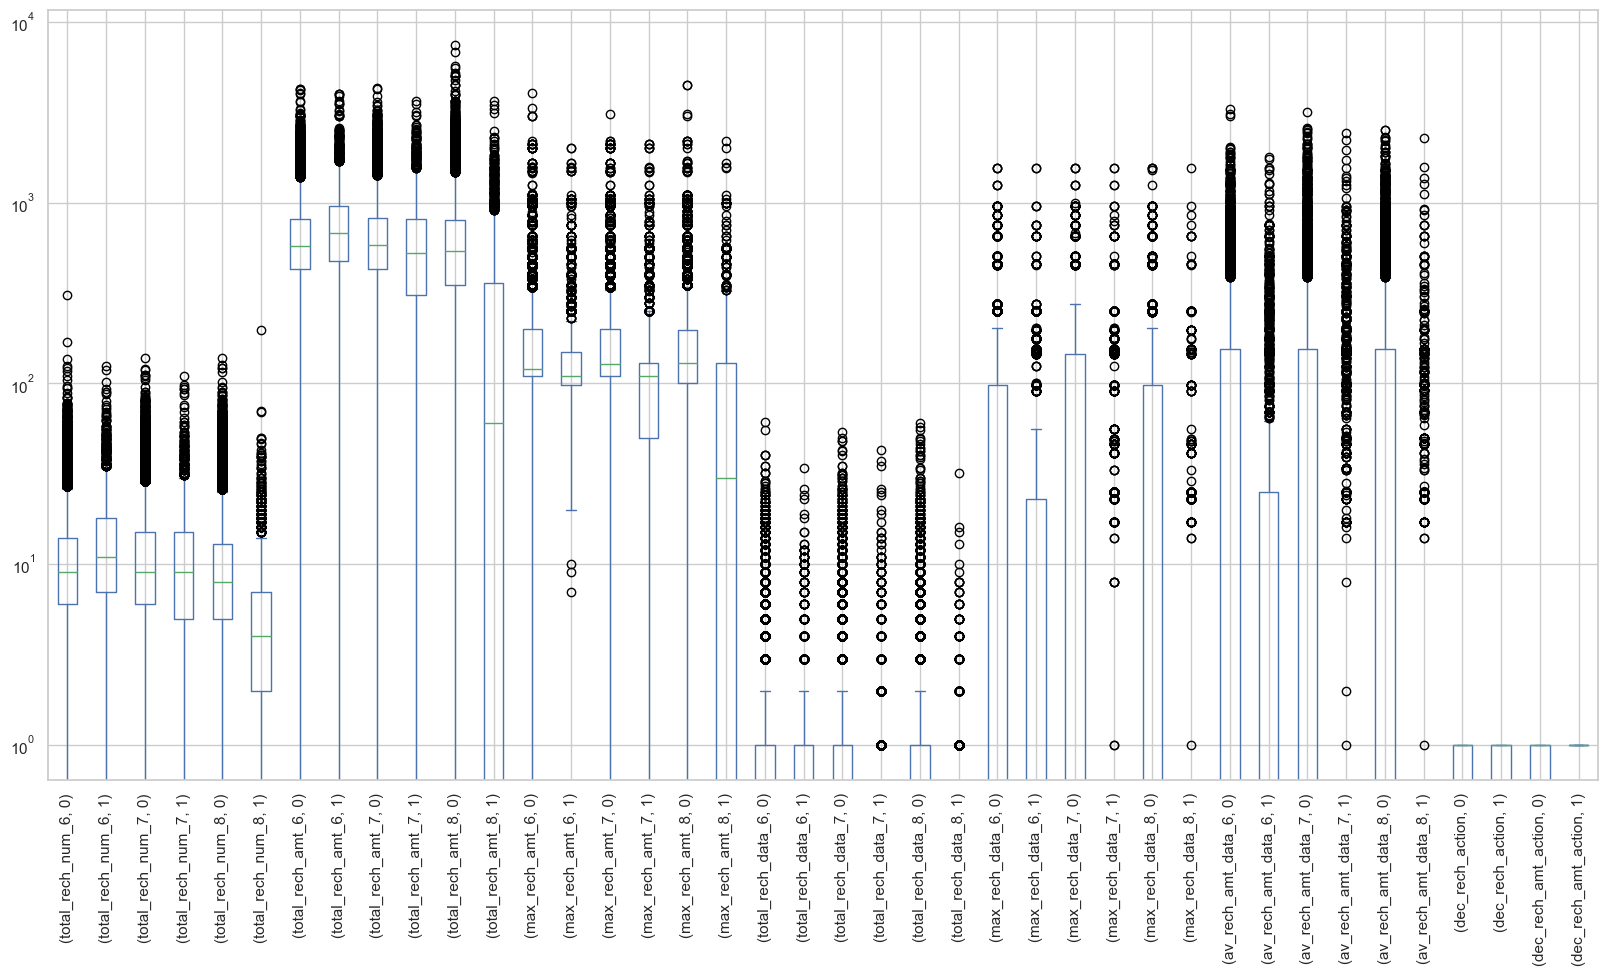

In [100]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

new_DF.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
 

### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_DF.drop(['Churn'], axis=1)

# Putting target variable to y
y = new_DF.pop('Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)


In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

### Scaling numeric features

During EDA outliers found in numeric features. 
So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.


In [106]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [107]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
20320,"1,409.37","1,052.63","1,674.24",453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.00,0.00,972.48,950.49,"1,088.03",4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,0.00,"1,163.51","1,086.31","1,176.66",268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,"1,054.93","1,091.14",764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,"1,099.96","1,154.76",831.43,0.00,0.00,0.00,0.00,0.00,6.13,0.00,0.00,0.00,14.00,10.00,13.00,"1,760.00","1,048.00","1,970.00",250.00,250.00,250.00,0.00,200.00,130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,791.00",0.00,0.00,0.00,1,1,1,1
43731,388.90,533.34,675.71,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.00,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.00,0.00,0.00,0.15,5.01,0.00,0.00,0.00,0.00,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,2.00,6.00,4.00,379.00,532.00,"1,034.00",379.00,250.00,400.00,0.00,27.00,350.00,0.00,1.00,1.00,0.00,145.00,154.00,0.00,145.00,154.00,0.00,1.84,3.87,0.00,478.99,127.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,372.00",38.22,114.06,236.82,0,0,0,0
90906,19.42,597.25,709.65,3.68,"1,031.28","1,018.29",24.89,927.86,"1,043.43",0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.00,0.00,1.08,19.78,10.29,3.63,"1,028.09","1,015.04",18.39,907.38,"1,028.61",0.00,0.00,0.00,22.03,"1,935.48","2,043.66",0.00,0.00,0.00,5.46,6.21,8.86,0.00,0.00,0.00,28.58,"1,961.48","2,062.

#### Scaling the TRAIN data set

In [108]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns 
binary_cols_to_remove=['dec_MOU_action','dec_rech_action','dec_rech_amt_action','dec_avg_revenuePC_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))

Total scalable columns:  137
Scalable cols after removing :  133


In [109]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [110]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
20320,2.64,1.53,3.14,0.35,0.09,0.72,0.96,0.89,0.99,0.68,0.37,1.54,0.81,0.54,2.13,1.32,0.86,1.60,1.60,2.00,2.07,-0.34,-0.30,-0.20,-0.22,-0.20,-0.23,1.87,1.81,2.33,-0.47,-0.48,-0.43,-0.04,-0.19,-0.22,-0.16,-0.15,-0.09,-0.35,-0.46,-0.44,-0.10,-0.10,-0.08,-0.22,-0.34,-0.29,-0.30,-0.02,-0.02,0.79,0.61,0.86,1.25,1.62,1.47,2.75,2.62,1.49,0.06,-0.10,-0.31,2.61,2.68,1.75,-0.15,-0.19,-0.23,0.05,0.28,0.24,0.02,-0.15,0.16,-0.04,0.07,0.09,2.22,2.30,1.51,-0.32,-0.12,-0.23,-0.16,-0.16,-0.07,-0.08,-0.09,-0.09,0.21,-0.19,0.30,2.85,0.97,3.07,0.52,0.49,0.60,-0.78,0.74,0.28,-0.43,-0.44,-0.43,-0.55,-0.55,-0.54,-0.51,-0.51,-0.50,-0.28,-0.27,-0.25,-0.32,-0.34,-0.33,-0.34,-0.34,-0.32,-0.29,-0.31,-0.33,-0.31,-0.31,-0.30,-0.15,-0.16,-0.14,0.54,-0.34,-0.34,-0.32,1,1,1,1
43731,-0.56,-0.10,0.43,-0.63,-0.63,-0.48,-0.47,-0.40,-0.19,-0.22,-0.18,-0.18,-0.26,-0.23,-0.21,-0.36,-0.34,-0.24,0.05,0.18,0.36,0.16,-0.32,0.30,-0.20,-0.20,-0.23,-0.20,-0.14,0.09,-0.47,-0.48,-0.39,-0.51,-0.49,-0.40,-0.16,-0.15,0.15,-0.67,-0.67,-0.53,-0.10,-0.10,-0.08,-0.32,-0.11,-0.29,-0.30,-0.02,-0.02,-0.75,-0.71,-0.44,-0.39,-0.38,-0.35,0.12,2.02,0.47,0.20,1.12,0.34,-0.09,1.37,0.20,-0.18,-0.16,-0.11,-0.31,-0.28,-0.20,-0.14,-0.15,-0.02,-0.34,-0.30,-0.21,-0.24,1.02,0.05,-0.32,-0.12,-0.23,-0.16,-0.16,-0.15,-0.08,-0.09,-0.09,-1.05,-0.61,-0.65,-0.76,-0.35,0.99,1.32,0.49,1.58,-0.78,-0.57,1.97,-0.43,-0.01,-0.01,-0.55,0.82,0.98,-0.51,0.28,0.38,-0.28,-0.27,-0.23,-0.32,0.28,-0.17,-0.34,-0.34,2.46,-0.29,-0.31,-0.33,-0.31,1.46,-0.30,-0.15,-0.16,-0.14,1.13,-0.23,-0.04,0.33,0,0,0,0
90906,-1.72,0.10,0.53,-0.66,1.58,1.68,-0.88,1.15,1.49,-0.22,-0.18,-0.18,-0.26,-0.23,-0.21,-0.39,-0.36,-0.36,-0.74,-0.70,-0.70,-0.34,-0.34,-0.33,0.52,-0.20,-0.23,-0.75,-0.70,-0.69,-0.47,2.06,2.16,-0.47,1.72,2.12,-0.16,-0.15,-0.15,-0.65,2.57,2.87,-0.10,-0.10,-0.08,-0.02,-0.05,0.09,-0.30,-0.02,-0.02,-1.05,1.98,2.21,-0.39,-0.40,-0.35,-0.66,-0.69,-0.60,-0.34,-0.34,-0.34,-0.72,-0.75,-0.65,-0.21,-0.21,-0.23,-0.16,0.29,-0.24,-0.14,-0.15,-0.14,-0.25,0.07,

### Transform the test set


In [111]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
2722,0.24,0.32,0.64,2.28,2.56,2.76,-0.35,-0.46,-0.43,-0.22,-0.18,-0.18,-0.26,-0.22,-0.21,0.02,-0.25,0.02,-0.18,-0.21,-0.42,-0.31,-0.34,-0.27,-0.22,-0.20,-0.23,-0.12,-0.32,-0.26,2.61,3.11,3.16,-0.20,-0.33,-0.19,-0.16,-0.15,-0.15,1.65,1.88,1.97,-0.10,-0.10,-0.08,-0.26,-0.12,-0.13,0.21,-0.02,-0.02,1.44,1.55,1.62,0.11,0.01,0.36,-0.52,-0.13,-0.54,-0.32,-0.34,-0.31,-0.36,-0.14,-0.24,0.09,0.44,-0.02,0.10,-0.12,-0.13,-0.14,-0.15,-0.14,0.10,0.13,-0.13,-0.29,-0.09,-0.29,-0.32,-0.12,-0.23,-0.06,-0.09,-0.15,-0.08,-0.09,-0.09,-0.42,-0.40,-0.12,0.44,0.46,0.77,-0.30,-0.27,-0.06,0.14,0.19,0.43,-0.43,-0.44,-0.43,-0.55,-0.55,-0.54,-0.51,-0.51,-0.50,-0.28,-0.27,-0.25,-0.32,-0.34,-0.33,-0.34,-0.34,-0.32,-0.29,-0.31,-0.33,-0.31,-0.31,-0.30,-0.15,-0.16,-0.14,-0.83,-0.34,-0.34,-0.32,0,0,0,0
28720,-0.88,-0.66,0.49,-0.60,-0.50,-0.36,-0.53,-0.45,-0.35,-0.22,-0.18,-0.18,-0.26,-0.23,-0.21,-0.28,-0.10,0.07,-0.03,0.12,0.15,-0.17,-0.34,-0.32,-0.22,-0.20,-0.23,-0.21,-0.02,0.13,-0.48,-0.49,-0.44,-0.51,-0.50,-0.42,-0.16,-0.02,-0.12,-0.68,-0.68,-0.57,-0.10,-0.10,-0.08,-0.32,-0.34,-0.29,-0.30,-0.02,-0.02,-0.76,-0.65,-0.46,-0.28,-0.07,0.50,0.56,0.60,0.78,-0.34,-0.34,-0.34,0.20,0.33,0.75,-0.22,-0.21,-0.23,-0.27,-0.29,-0.25,-0.14,-0.15,-0.08,-0.33,-0.34,-0.31,0.01,0.11,0.48,-0.32,-0.12,-0.23,-0.16,-0.16,-0.15,-0.08,-0.09,-0.09,0.21,0.65,0.52,-0.91,-0.63,0.46,-0.86,-0.87,1.09,-0.55,-0.55,-0.49,2.81,3.37,2.10,-0.30,-0.31,0.89,0.51,0.64,0.18,1.93,-0.08,-0.24,-0.32,1.67,1.41,-0.34,-0.34,-0.32,3.84,0.74,0.22,-0.31,-0.31,1.51,-0.15,7.58,3.94,1.52,0.98,-0.17,-0.32,0,0,0,0
43175,0.55,-0.02,0.17,2.05,2.24,2.18,-0.68,-0.64,-0.54,-0.22,-0.18,-0.18,-0.26,-0.23,-0.21,-0.24,-0.32,-0.33,-0.61,-0.72,-0.59,-0.28,-0.24,-0.33,-0.22,-0.20,-0.23,-0.56,-0.68,-0.60,2.51,2.79,2.71,-0.31,-0.30,-0.24,-0.16,-0.15,-0.15,1.51,1.68,1.64,-0.10,-0.10,-0.08,-0.03,1.38,0.13,3.39,-0.02,-0.02,1.06,1.21,1.15,0.06,-0.11,0.29,-0.42,-0.51,-0.34,0.77,0.55,0.48,-0.16,-0.33,-0.03,-0.10,0.20,0.16,-0.31,-0.32,-0.29,-0.09,-0.14,-0.14

### Model building

In [112]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [113]:
# Looking at the Principal components
pca.components_

array([[ 6.12072625e-02,  6.98308150e-02,  8.49976079e-02, ...,
        -9.35987104e-03, -1.05540764e-02, -6.84471898e-03],
       [ 1.16828199e-01,  1.49269283e-01,  1.45716609e-01, ...,
        -1.44030050e-02, -1.52207060e-02, -1.19810393e-02],
       [ 1.12558134e-01,  1.66501066e-01,  1.58336434e-01, ...,
        -1.89461055e-02, -2.11722422e-02, -1.99618758e-02],
       ...,
       [ 7.39807193e-16, -1.65677504e-16, -2.59577574e-16, ...,
         1.04806164e-16, -3.66141499e-18,  1.72118870e-16],
       [-0.00000000e+00, -7.61767604e-17, -2.69209748e-16, ...,
         4.13331806e-17, -9.16326952e-17,  1.79957886e-17],
       [ 0.00000000e+00,  7.44887779e-17,  4.03707037e-16, ...,
        -1.52611007e-16,  5.63054495e-17,  4.27238848e-17]])

In [114]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[  9.6643  18.4144  25.2592  29.7934  34.173   37.7111  40.6681  43.4119
  45.9114  48.3098  50.5329  52.7008  54.7922  56.847   58.7085  60.4495
  62.0346  63.5165  64.8692  66.1872  67.4557  68.6673  69.8084  70.9384
  72.0649  73.0442  73.9941  74.9165  75.8112  76.6548  77.4718  78.2419
  78.9744  79.6814  80.3764  81.0533  81.7254  82.3811  83.0049  83.6198
  84.2146  84.7948  85.3401  85.8781  86.4027  86.9071  87.3656  87.8068
  88.2072  88.602   88.9764  89.3445  89.7087  90.0712  90.4253  90.7721
  91.1048  91.4344  91.7603  92.0809  92.3904  92.6934  92.9728  93.2473
  93.5111  93.7726  94.0302  94.2842  94.5368  94.7712  94.9999  95.2215
  95.4422  95.658   95.8655  96.0693  96.2667  96.4621  96.6507  96.8371
  97.0167  97.1946  97.3651  97.5333  97.6934  97.8511  98.0069  98.1604
  98.3053  98.4446  98.5727  98.6986  98.8197  98.9356  99.0466  99.1451
  99.2361  99.324   99.4115  99.4963  99.5759  99.6446  99.7124  99.7723
  99.828   99.8676  99.9059  99.9413  99.9707  99.9

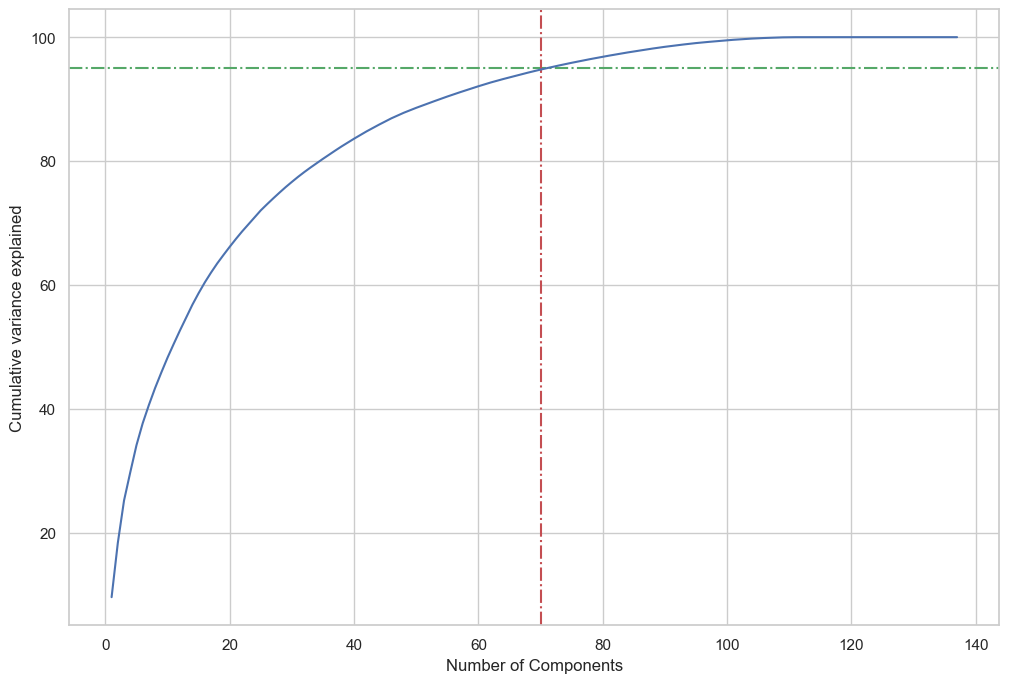

In [115]:
# # Plotting scree plot
fig = plt.figure(figsize=[12,8])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")
plt.show()

#### Conclusion

As per above looks like 70 components are enough to describe 95% of the variance in the dataset. Choose 70 components for the modeling.


Using incremental PCA for better efficiency

In [116]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [117]:
print("Earlier dataset size :",X_train.shape)
print("Dataset after PCA size :", X_train_pca.shape)

Earlier dataset size : (20790, 137)
Dataset after PCA size : (20790, 70)


In [118]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))


max positive corr: 0.014 , min negative corr:  -0.016


#### Conclusion

The correlation among the attributes is almost 0, we can proceed with these principal components.


#### Applying transformation on the test set


In [119]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

## Model Building

Build model to predict customer churn

#### Logistic regression with PCA

In [120]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [121]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [122]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [124]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusion matrix 	
 [[6640 1503]
 [ 128  639]]
sensitivity 	 0.83
specificity 	 0.82
area under the curve 	 0.82


##### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [125]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [126]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [127]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.21,0.02,0.01,0.01,0.01,{'C': 0.01},0.89,0.89,0.89,0.88,0.89,0.89,0.01,6,0.89,0.89,0.89,0.90,0.89,0.89,0.00
1,0.54,0.18,0.02,0.00,0.10,{'C': 0.1},0.89,0.89,0.89,0.88,0.89,0.89,0.01,5,0.90,0.89,0.89,0.90,0.90,0.90,0.00
2,0.53,0.22,0.01,0.01,1,{'C': 1},0.89,0.89,0.89,0.88,0.89,0.89,0.01,1,0.90,0.89,0.89,0.90,0.90,0.90,0.00
3,0.72,0.30,0.01,0.01,10,{'C': 10},0.89,0.89,0.89,0.88,0.89,0.89,0.01,4,0.90,0.89,0.89,0.90,0.90,0.90,0.00
4,0.62,0.09,0.02,0.00,100,{'C': 100},0.89,0.89,0.89,0.88,0.89,0.89,0.01,3,0.90,0.89,0.89,0.90,0.90,0.90,0.00
5,0.63,0.26,0.01,0.01,1000,{'C': 1000},0.89,0.89,0.89,0.88,0.89,0.89,0.01,2,0.90,0.89,0.89,0.90,0.90,0.90,0.00


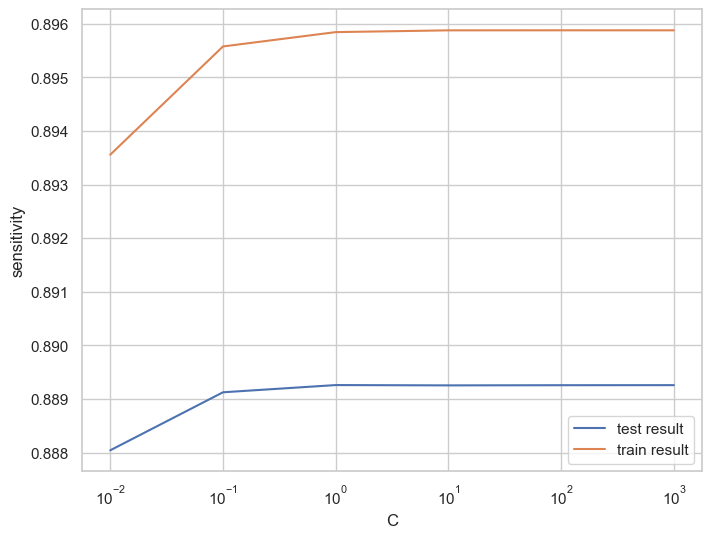

In [128]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [129]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8892599161960091 at C = 1


#### MODEL WITH OPTIMUM Paramaters

In [130]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set

In [131]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

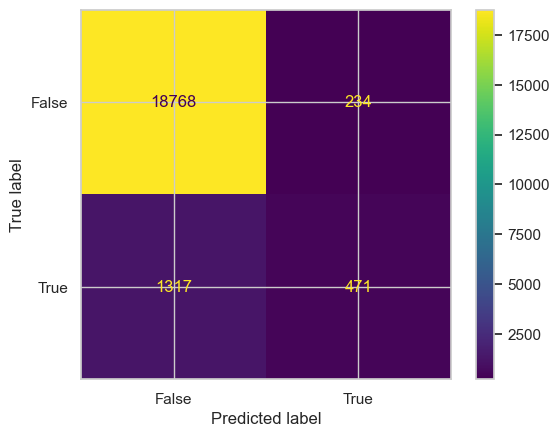

In [132]:
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot() 

In [133]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [134]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

Accuracy:- 0.9253968253968254
Sensitivity:- 0.2634228187919463
Specificity:- 0.9876855067887591
Recall:- 0.2634228187919463
AUC:    	 0.9


### Prediction on the test set

In [136]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

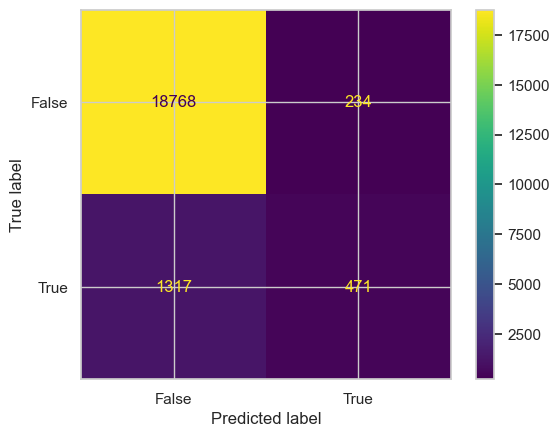

In [137]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [141]:
# Accuracy
print("Accuracy    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC       \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy    	 0.93
Sensitivity  	 0.26
Specificity  	 0.99
Recall    	 0.26
AUC       	 0.89


#### Prediction on the test set

In [142]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

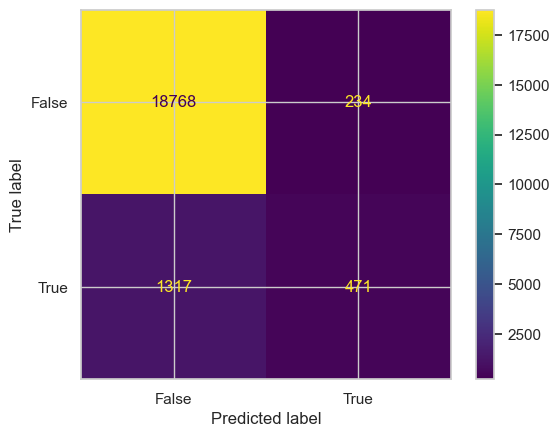

In [143]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

Prediction on the test set

In [145]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

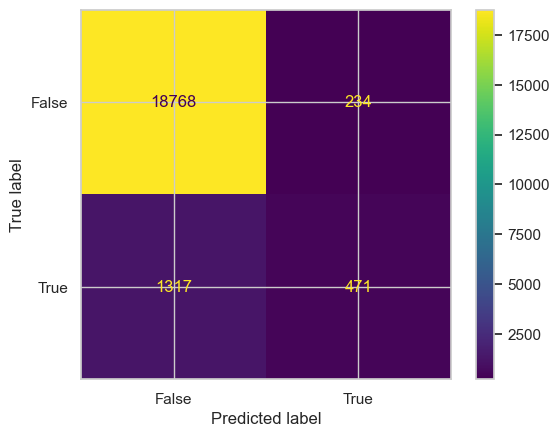

In [146]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [149]:
# Accuracy
print("Accuracy    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC       \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy    	 0.93
Sensitivity  	 0.26
Specificity  	 0.99
Recall    	 0.26
AUC       	 0.89


### Conclusion
OverAll the model is performing well in the TEST set, as per trained from the TRAIN set.

### Logistic Regression without PCA

In [161]:
import statsmodels.api as sm

# Instantiate the model and also Adding the constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20655
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       7542.7
Time:                        12:39:32   Pearson chi2:                 2.77e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1013      0.171    -23.984      0.000      -4.436      -3.766
arpu_6                       0.1983      0.094      2.110      0.035       0.014       0.382
arpu_7                       0.1217      0.098      1.242      0.214      -0.070       0.314
arpu_8                       0.2211      0.146      1.517      0.129      -0.065       0.507
onnet_mou_6                  7.8334      3.614      2.167      0.030       0.749      14.917
onnet_mou_7                 -4.7428      2.393     -1.982      0.047      -9.432      -0.053
onnet_mou_8                  2.3952      2.356      1.017      0.309      -2.222       7.012
offnet_mou_6                 7.8835      3.530      2.233      0.026       0.964      14.803
offnet_mou_7                -4.4035      2.278     -1.933      0.053      -8.868       0.061
offnet_mou_8                 1.9580      2.376      0.824      0.410      -2.698       6.614
roam_ic_mou_6                0.0558      0.032      1.727      0.084      -0.008       0.119
roam_ic_mou_7                0.0047      0.038      0.125      0.901      -0.070       0.079
roam_ic_mou_8               -0.0124      0.031     -0.399      0.690      -0.073       0.048
roam_og_mou_6               -1.9340      0.889     -2.177      0.030      -3.676      -0.192
roam_og_mou_7                0.9747      0.454      2.145      0.032       0.084       1.865
roam_og_mou_8               -0.4587      0.513     -0.895      0.371      -1.463       0.546
loc_og_t2t_mou_6           825.7356   1372.541      0.602      0.547   -1864.395    3515.866
loc_og_t2t_mou_7           454.1216   1445.983      0.314      0.753   -2379.952    3288.195
loc_og_t2t_mou_8          7814.6605   1518.146      5.148      0.000    4839.149    1.08e+04
loc_og_t2m_mou_6           805.7837   1339.915      0.601      0.548   -1820.401    3431.969
loc_og_t2m_mou_7           410.1648   1306.312      0.314      0.754   -2150.159    2970.489
loc_og_t2m_mou_8          7544.1261   1465.550      5.148      0.000    4671.702    1.04e+04
loc_og_t2f_mou_6            67.8830    112.918      0.601      0.548    -153.432     289.198
loc_og_t2f_mou_7            36.2092    115.679      0.313      0.754    -190.517     262.935
loc_og_t2f_mou_8           631.7308    122.701      5.149      0.000     391.241     872.220
loc_og_t2c_mou_6            -0.0369      0.035     -1.057      0.291      -0.105       0.032
loc_og_t2c_mou_7             0.0807      0.045      1.810      0.070      -0.007       0.168
loc_og_t2c_mou_8            -0.0351      0.043     -0.813      0.416      -0.120       0.050
loc_og_mou_6             -2135.1227   2558.853     -0.834      0.404   -7150.383    2880.138
loc_og_mou_7              -965.4269   2741.494     -0.352      0.725   -6338.657    4407.803
loc_og_mou_8  

## Feature selection using RFE

In [155]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### Using RFE with 15 columns/features

In [157]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [158]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'monthly_2g_8'],
      dtype='object')


### Model 1

In [162]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20774
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8180.5
Time:                        14:27:49   Pearson chi2:                 8.52e+10
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4093      0.217    -20.359      0.000      -4.834      -3.985
arpu_6                 0.2951      0.028     10.458      0.000       0.240       0.350
loc_og_t2m_mou_8      -0.6380      0.118     -5.426      0.000      -0.869      -0.408
og_others_8          -11.1277     12.675     -0.878      0.380     -35.971      13.716
total_og_mou_8        -0.5665      0.060     -9.387      0.000      -0.685      -0.448
loc_ic_t2m_mou_7       0.3472      0.093      3.723      0.000       0.164       0.530
loc_ic_t2m_mou_8      -1.1198      0.295     -3.800      0.000      -1.697      -0.542
loc_ic_mou_8          -0.6313      0.283     -2.229      0.026      -1.186      -0.076
total_ic_mou_7         0.3756      0.078      4.810      0.000       0.223       0.529
total_ic_mou_8        -1.1516      0.199     -5.788      0.000      -1.541      -0.762
spl_ic_mou_8          -0.3785      0.061     -6.195      0.000      -0.498      -0.259
total_rech_num_8      -0.3517      0.053     -6.654      0.000      -0.455      -0.248
last_day_rch_amt_8    -0.6173      0.061    -10.105      0.000      -0.737      -0.498
total_rech_data_8     -0.3931      0.074     -5.341      0.000      -0.537      -0.249
max_rech_data_8       -0.4399      0.064     -6.875      0.000      -0.565      -0.315
monthly_2g_8          -0.3054      0.076     -4.029      0.000      -0.454      -0.157
======================================================================================
"""

In [163]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [164]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
8,total_ic_mou_8,7.92
5,loc_ic_t2m_mou_8,7.32
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.35
1,loc_og_t2m_mou_8,1.55
3,total_og_mou_8,1.48
10,total_rech_num_8,1.48
13,max_rech_data_8,1.36
12,total_rech_data_8,1.23


In [165]:
# Removing total_rech_data_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('total_rech_data_8')
print(log_cols)

['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'monthly_2g_8']


### Model 2

In [166]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20775
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8220.0
Time:                        14:39:38   Pearson chi2:                 1.02e+11
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4014      0.218    -20.216      0.000      -4.828      -3.975
arpu_6                 0.2977      0.028     10.533      0.000       0.242       0.353
loc_og_t2m_mou_8      -0.6570      0.118     -5.568      0.000      -0.888      -0.426
og_others_8          -11.4089     12.753     -0.895      0.371     -36.404      13.586
total_og_mou_8        -0.5125      0.059     -8.746      0.000      -0.627      -0.398
loc_ic_t2m_mou_7       0.3359      0.093      3.609      0.000       0.153       0.518
loc_ic_t2m_mou_8      -1.1033      0.295     -3.739      0.000      -1.682      -0.525
loc_ic_mou_8          -0.6506      0.284     -2.291      0.022      -1.207      -0.094
total_ic_mou_7         0.3854      0.078      4.933      0.000       0.232       0.539
total_ic_mou_8        -1.1689      0.200     -5.859      0.000      -1.560      -0.778
spl_ic_mou_8          -0.3802      0.061     -6.198      0.000      -0.500      -0.260
total_rech_num_8      -0.4619      0.051     -9.036      0.000      -0.562      -0.362
last_day_rch_amt_8    -0.6068      0.061     -9.952      0.000      -0.726      -0.487
max_rech_data_8       -0.5937      0.063     -9.414      0.000      -0.717      -0.470
monthly_2g_8          -0.2876      0.076     -3.798      0.000      -0.436      -0.139
======================================================================================
"""

In [167]:
# Checking VIF of Model 2

VIF_CALC(X_train[log_cols])

,Features,VIF
8,total_ic_mou_8,7.92
5,loc_ic_t2m_mou_8,7.32
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.35
1,loc_og_t2m_mou_8,1.55
3,total_og_mou_8,1.45
10,total_rech_num_8,1.30
12,max_rech_data_8,1.27
11,last_day_rch_amt_8,1.18


In [172]:
# Removing sachet_3g_6 column 
log_cols.remove('monthly_2g_8')
print(log_cols)

['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8']


#### Model 3

In [173]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20776
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8237.7
Time:                        14:47:10   Pearson chi2:                 9.84e+10
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3882      0.217    -20.268      0.000      -4.813      -3.964
arpu_6                 0.3002      0.028     10.604      0.000       0.245       0.356
loc_og_t2m_mou_8      -0.6565      0.118     -5.566      0.000      -0.888      -0.425
og_others_8          -11.2943     12.684     -0.890      0.373     -36.155      13.567
total_og_mou_8        -0.5132      0.059     -8.751      0.000      -0.628      -0.398
loc_ic_t2m_mou_7       0.3474      0.093      3.751      0.000       0.166       0.529
loc_ic_t2m_mou_8      -1.1273      0.294     -3.833      0.000      -1.704      -0.551
loc_ic_mou_8          -0.6531      0.285     -2.295      0.022      -1.211      -0.095
total_ic_mou_7         0.3751      0.077      4.849      0.000       0.224       0.527
total_ic_mou_8        -1.1591      0.199     -5.821      0.000      -1.549      -0.769
spl_ic_mou_8          -0.3793      0.061     -6.191      0.000      -0.499      -0.259
total_rech_num_8      -0.4572      0.051     -8.933      0.000      -0.557      -0.357
last_day_rch_amt_8    -0.6058      0.061     -9.887      0.000      -0.726      -0.486
max_rech_data_8       -0.7318      0.060    -12.227      0.000      -0.849      -0.615
======================================================================================
"""

In [175]:
VIF_CALC(X_train[log_cols])

,Features,VIF
8,total_ic_mou_8,7.92
5,loc_ic_t2m_mou_8,7.32
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.35
1,loc_og_t2m_mou_8,1.55
3,total_og_mou_8,1.45
10,total_rech_num_8,1.30
11,last_day_rch_amt_8,1.17
12,max_rech_data_8,1.10


In [176]:
# Removing sachet_3g_6 column 
log_cols.remove('max_rech_data_8')
print(log_cols)

['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8']


### Model 4


In [177]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20777
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8466.5
Time:                        15:28:25   Pearson chi2:                 2.07e+11
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3233      0.201    -21.497      0.000      -4.717      -3.929
arpu_6                 0.2804      0.027     10.221      0.000       0.227       0.334
loc_og_t2m_mou_8      -0.6683      0.119     -5.620      0.000      -0.901      -0.435
og_others_8          -10.1556     11.667     -0.870      0.384     -33.022      12.711
total_og_mou_8        -0.3540      0.056     -6.376      0.000      -0.463      -0.245
loc_ic_t2m_mou_7       0.3891      0.093      4.201      0.000       0.208       0.571
loc_ic_t2m_mou_8      -1.2026      0.300     -4.012      0.000      -1.790      -0.615
loc_ic_mou_8          -0.7169      0.291     -2.465      0.014      -1.287      -0.147
total_ic_mou_7         0.3916      0.077      5.072      0.000       0.240       0.543
total_ic_mou_8        -1.2624      0.202     -6.262      0.000      -1.658      -0.867
spl_ic_mou_8          -0.3778      0.062     -6.115      0.000      -0.499      -0.257
total_rech_num_8      -0.5302      0.052    -10.106      0.000      -0.633      -0.427
last_day_rch_amt_8    -0.8172      0.059    -13.916      0.000      -0.932      -0.702
======================================================================================
"""

In [178]:
VIF_CALC(X_train[log_cols])

,Features,VIF
8,total_ic_mou_8,7.90
5,loc_ic_t2m_mou_8,7.32
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.35
1,loc_og_t2m_mou_8,1.55
3,total_og_mou_8,1.42
10,total_rech_num_8,1.30
11,last_day_rch_amt_8,1.12
0,arpu_6,1.08


In [180]:
# Removing sachet_2g_6 column 
log_cols.remove('last_day_rch_amt_8')
print(log_cols)

['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8']


#### Model 5

In [181]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20778
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8750.3
Time:                        15:35:14   Pearson chi2:                 2.13e+10
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3414      0.201    -21.574      0.000      -4.736      -3.947
arpu_6               0.2613      0.026      9.994      0.000       0.210       0.312
loc_og_t2m_mou_8    -0.8379      0.123     -6.807      0.000      -1.079      -0.597
og_others_8        -10.2894     11.643     -0.884      0.377     -33.110      12.531
total_og_mou_8      -0.4713      0.054     -8.707      0.000      -0.577      -0.365
loc_ic_t2m_mou_7     0.4395      0.092      4.789      0.000       0.260       0.619
loc_ic_t2m_mou_8    -1.2010      0.307     -3.907      0.000      -1.804      -0.599
loc_ic_mou_8        -0.8178      0.305     -2.685      0.007      -1.415      -0.221
total_ic_mou_7       0.4237      0.077      5.496      0.000       0.273       0.575
total_ic_mou_8      -1.4832      0.209     -7.102      0.000      -1.893      -1.074
spl_ic_mou_8        -0.3481      0.061     -5.693      0.000      -0.468      -0.228
total_rech_num_8    -0.4390      0.052     -8.512      0.000      -0.540      -0.338
====================================================================================
"""

In [182]:
VIF_CALC(X_train[log_cols])

,Features,VIF
8,total_ic_mou_8,7.89
5,loc_ic_t2m_mou_8,7.32
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.35
1,loc_og_t2m_mou_8,1.53
3,total_og_mou_8,1.40
10,total_rech_num_8,1.22
0,arpu_6,1.07
9,spl_ic_mou_8,1.02


In [184]:
# Removing total_rech_data_7 column 
log_cols.remove('total_rech_num_8')
print(log_cols)

['arpu_6', 'loc_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8']


#### Model 6

In [185]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20790
Model:                            GLM   Df Residuals:                    20779
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Mar 2024   Deviance:                       8837.4
Time:                        15:36:51   Pearson chi2:                 1.65e+11
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3576      0.202    -21.529      0.000      -4.754      -3.961
arpu_6               0.2634      0.026     10.151      0.000       0.213       0.314
loc_og_t2m_mou_8    -0.8099      0.124     -6.523      0.000      -1.053      -0.567
og_others_8        -10.3262     11.704     -0.882      0.378     -33.267      12.614
total_og_mou_8      -0.6949      0.051    -13.585      0.000      -0.795      -0.595
loc_ic_t2m_mou_7     0.4600      0.092      5.011      0.000       0.280       0.640
loc_ic_t2m_mou_8    -1.3565      0.307     -4.425      0.000      -1.957      -0.756
loc_ic_mou_8        -0.7410      0.304     -2.440      0.015      -1.336      -0.146
total_ic_mou_7       0.4455      0.077      5.808      0.000       0.295       0.596
total_ic_mou_8      -1.5549      0.213     -7.312      0.000      -1.972      -1.138
spl_ic_mou_8        -0.3868      0.062     -6.250      0.000      -0.508      -0.266
====================================================================================
"""

In [186]:
VIF_CALC(X_train[log_cols])

,Features,VIF
8,total_ic_mou_8,7.88
5,loc_ic_t2m_mou_8,7.31
6,loc_ic_mou_8,7.25
4,loc_ic_t2m_mou_7,5.39
7,total_ic_mou_7,5.34
1,loc_og_t2m_mou_8,1.53
3,total_og_mou_8,1.18
0,arpu_6,1.07
9,spl_ic_mou_8,1.01
2,og_others_8,1.00


#### Model performance on the train set

In [187]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

20320                   0.00
43731                   0.02
90906                   0.01
4169                    0.00
52766                   0.45
dtype: float64

In [188]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.00,0
1,0,0.02,1
2,0,0.01,2
3,0,0.00,3
4,0,0.45,4


In [189]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00,0,1,0,0,0,0,0,0,0,0,0
1,0,0.02,1,1,0,0,0,0,0,0,0,0,0
2,0,0.01,2,1,0,0,0,0,0,0,0,0,0
3,0,0.00,3,1,0,0,0,0,0,0,0,0,0
4,0,0.45,4,1,1,1,1,1,0,0,0,0,0


Now Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [190]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.09                 1.00   
0.10                 0.10                 0.78                 0.82   
0.20                 0.20                 0.89                 0.71   
0.30                 0.30                 0.92                 0.55   
0.40                 0.40                 0.92                 0.23   
0.50                 0.50                 0.92                 0.10   
0.60                 0.60                 0.92                 0.05   
0.70                 0.70                 0.92                 0.02   
0.80                 0.80                 0.91                 0.02   
0.90                 0.90                 0.91                 0.01   

              specificity  
0.00                 0.00  
0.10                 0.78  
0.20                 0.90  
0.30                 0.96  
0.40                 0.99  
0.50                 0.99  
0.60                 1

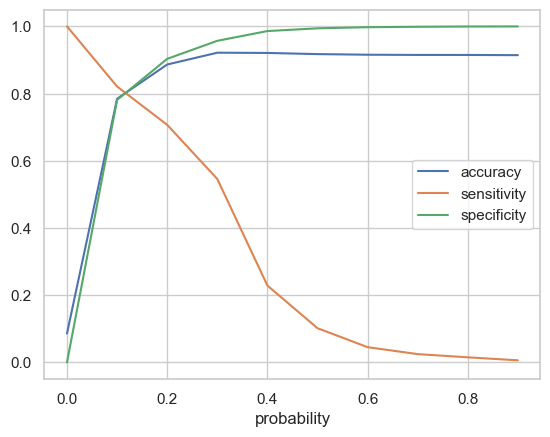

In [191]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.1 approx

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Hence, cutoff point to be 0.1

In [193]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.01,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.00,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.45,4,1,1,1,1,1,0,0,0,0,0,0


#### Evaluation Metrics

In [194]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18955    47]
 [ 1707    81]]


In [195]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [196]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-",round( TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.92
Sensitivity:- 0.05
Specificity:- 1.0
Recall:- 0.05


#### Conclusion :
    Good accuracy, sensitivity and specificity on the train set prediction

In [197]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

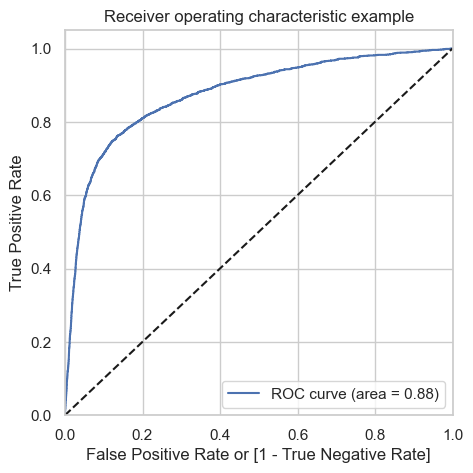

In [198]:
PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

AUC value of 0.88 which is a very good value. Indicating that we have a good predictive model.

#### Model Performance on the test set

In [199]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [200]:
# Predict on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_6.predict(X_test_sm)

y_test_pred.head()

2722                    0.03
28720                   0.00
43175                   0.02
50024                   0.57
37809                   0.04
dtype: float64

In [201]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2722,0.03
28720,0.00
43175,0.02
50024,0.57
37809,0.04


In [202]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
2722,0
28720,0
43175,0
50024,1
37809,0


In [203]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [204]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,2722,0.03
1,0,28720,0.00
2,0,43175,0.02
3,1,50024,0.57
4,0,37809,0.04


In [206]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

y_test_pred_final.head()

,Churn,CustID,churn_prob
0,0,2722,0.03
1,0,28720,0.00
2,0,43175,0.02
3,1,50024,0.57
4,0,37809,0.04


In [207]:
# In the test set using optimal probablity cutoff 0.6, that we considered previously. 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,2722,0.03,0
1,0,28720,0.00,0
2,0,43175,0.02,0
3,1,50024,0.57,0
4,0,37809,0.04,0


### EVALUATION METRICS

In [208]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[8130   13]
 [ 723   44]]


In [214]:
# Accuracy
print("Accuracy     ",round(metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']),2))

# Sensitivity
print("Sensitivity  ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity  ", round(TN / float(TN+FP),2))

# Recall
print("Recall       " , round(TP/float(TP+FN),2))

Accuracy      0.92
Sensitivity   0.05
Specificity   1.0
Recall        0.05


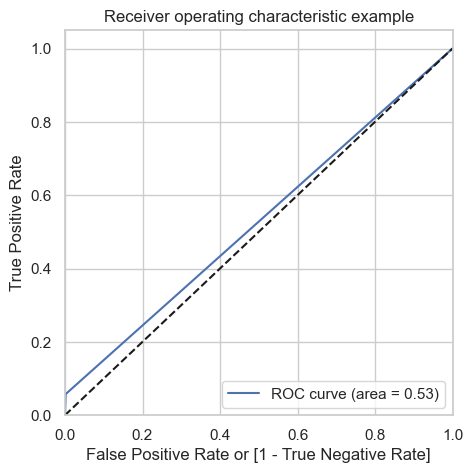

In [215]:
PLOT_ROC(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])

ROC plot has AUC of 0.76

In [220]:
Imp_Features=pd.DataFrame({'FEATURES':['loc_og_t2m_mou_8', 'total_og_mou_8', 'arpu_6',
        'spl_ic_mou_8', 'og_others_8']})
Imp_Features

,FEATURES
0,loc_og_t2m_mou_8
1,total_og_mou_8
2,arpu_6
3,spl_ic_mou_8
4,og_others_8


### Conclusion

There is considerable drop in recharge, call usage and data usage in the 8th month which is the Action Phase. Below are the important features:

Important features are loc_og_t2m_mou_8, total_og_mou_8, arpu_6, spl_ic_mou_8, og_others_8

1. Local Minutes of usage (outgoing) are the most affecting features on the customer churn.

2. Total Outgoing calls in 8th month is a very important feature to decide the Customer Churn rate.

3. Average revenue per user in the 6th month. A sudden drop in it in preceeding months indicate that the customer might be thinking about churning and appropriate actions should be taken.

4. Outgoing calls are also affecting features on the Customer Churn.

5. Special incoming calls also affect the customer churn rate.



#### Various Strategy that can be incorporated

1. Efforts should be made to provide better network and focus on customer satisfaction.


2. The usage / last recharge/ onnet usage, routine feedback calls should be made for customer satisfaction and services that can understand their grievances & expectations. Appropriate action should be taken to avoid them from churning.

3. Attractive offers can be introduced to customers showing for the increase in total amount spent on calls & data recharge in the action phase.

4. Special call plans should be provided to such customers to stop them from churning.

5. Offers and promotional calls can also be very helpful.